### Import Packages

In [266]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

### Create Necessary Functions

In [75]:
def gaussian_prob(x_i, mu, Sigma):
    n = len(mean)
    return (1/((2 * np.pi) ** (n/2) * np.linalg.det(Sigma) ** (1/2)) *
                np.exp(-1/2 * np.linalg.multi_dot([np.transpose(x_i - mu), np.linalg.inv(Sigma), (x_i - mu)])))

In [90]:
def point_prob(x_i, col, pi, mean, cov):
    denom = 0
    for i in range(len(pi)):
        denom += gaussian_prob(x_i, mean[i, :], cov[i])
    num = gaussian_prob(x_i, mean[col, :], cov[col]) * pi[col]
    return num / denom

In [99]:
def calc_probs(data, k, pi, mean, cov):
    probs = np.zeros([data.shape[0], k])
    for row in range(data.shape[0]):
        for col in range(k):
            probs[row, col] = point_prob(data[row, :], col, pi, mean, cov)
            
    return probs

In [259]:
def update_weights(data, probs, k):
    m = np.sum(probs, axis = 0)
    pi = m / np.sum(m)
    mean = np.multiply(np.dot(np.transpose(probs), data), (1 / m).reshape(-1, 1))
    for c in range(k):
        r_c = np.diag(probs[:, c])
        cov[c] = np.linalg.multi_dot([np.transpose(data - mean[c, :]), r_c, (data - mean[c, :])]) / m[c]
    return (pi, mean, cov)

In [215]:
def calc_ll(data, pi, mean, cov):
    ll = 0
    for row in range(data.shape[0]):
        row_sum = 0
        for col in range(len(pi)):
            row_sum += gaussian_prob(data[row, :], mean[col, :], cov[col])
        ll += np.log(row_sum)
    return ll

In [239]:
def initialize_gmm(data, k):
    pi = np.ones(k) * 1/k
    mean_idx = np.random.choice(data.shape[0], size = k, replace = False)
    mean = data[mean_idx,:]
    cov = np.diag(np.ones(data.shape[1])) * np.ones([k, data.shape[1], data.shape[1]])
        
    return (pi, mean, cov)

In [261]:
def iterate_gmm(data, k, pi, mean, cov):
    log_like = calc_ll(data, pi, mean, cov)
    while True:
        probs = calc_probs(data, k, pi, mean, cov)
        pi, mean, cov = update_weights(data, probs, k)
        if np.abs(calc_ll(data, pi, mean, cov) - log_like) < 1e-3:
            break
        log_like = calc_ll(data, pi, mean, cov)
        print(log_like)
    return (pi, mean, cov, probs)

### Generate Dataset

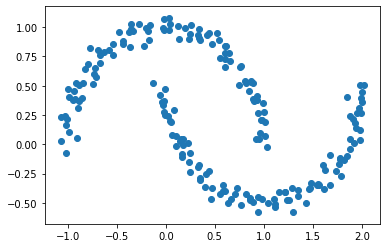

In [267]:
mean_1 = np.array([3, 3])
cov_1 = np.array([[1, .2],
                  [.2, .5]])

mean_2 = np.array([0, 0])
cov_2 = np.array([[1, 0],
                  [0, 1.5]])

mean_3 = np.array([2, 0])
cov_3 = np.array([[.5, -.2],
                  [-.2, .5]])

a = np.random.normal(size = [100, 2])

data_1 = np.dot(a, cov_1) + mean_1
data_2 = np.dot(a, cov_2) + mean_2
data_3 = np.dot(a, cov_3) + mean_3

# plt.scatter(data_1[:, 0], data_1[:, 1], color = 'C0')
# plt.scatter(data_2[:, 0], data_2[:, 1], color = 'C1')
# plt.scatter(data_3[:, 0], data_3[:, 1], color = 'C2')

data = np.append(data_1, data_2, axis = 0)
data = np.append(data, data_3, axis = 0)

Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);
data = Xmoon

### Perform Clustering

In [330]:
# Initialize mean, cov, pi
k = 20

pi, mean, cov = initialize_gmm(data, k)
pi, mean, cov, probs = iterate_gmm(data, k, pi, mean, cov)

print(mean)
print(cov)

-3078.754511643388
-3072.1456391113165
-3062.7927758491874
-3051.9495018656735
-3040.4199623365544
-3027.7015174255916
-3013.9407059967607
-2998.418584199237
-2980.3622528061856
-2961.42980040014
-2942.8298795301093
-2923.5622897916655
-2903.0970904905234
-2884.829973099
-2869.8840665020757
-2858.089323592526
-2849.318867620536
-2843.8493375752264
-2840.0881917716165
-2836.2599415066265
-2830.42904675206
-2820.042176558588
-2811.118829068609
-2805.1061048318356
-2800.385908809946
-2796.771465277526
-2793.0341770230807
-2788.019141561404
-2780.981678700031
-2773.968157857361
-2768.748759261814
-2764.6956897325135
-2761.64700382142
-2759.2006289144147
-2757.4630195866994
-2755.943060024208
-2754.2986363822706
-2752.5926577150735
-2751.0108906704086
-2749.5871294202834
-2748.2972862554084
-2747.112670531081
-2745.9556652252036
-2744.780020627897
-2743.5642432745103
-2742.294148842869
-2741.1253184334223
-2740.128786850276
-2739.201337762632
-2738.4159557948255
-2737.9310159305555
-2737.68

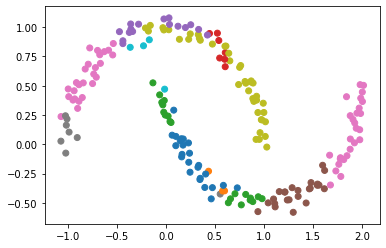

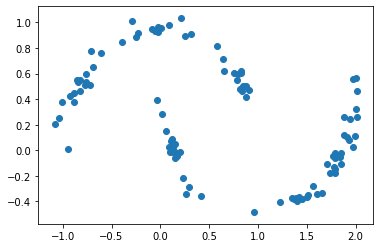

In [332]:
preds = np.argmax(probs, axis = 1)
colors = ['C' + str(preds[i]) for i in range(len(preds))]
plt.figure(0)
plt.scatter(data[:, 0], data[:, 1], color = colors)

counts = np.unique(preds, return_counts = True)
point_probs = []
for i in range(k):
    if i in counts[0]:
        point_probs.append(counts[1][np.where(i == counts[0])[0][0]])
    else:
        point_probs.append(0)
point_probs = point_probs / np.sum(point_probs)
point_probs

new_idx = np.random.choice(len(pi), size = 200, p = point_probs)
new_points = np.zeros([100, 2])
for i in range(100):
    new_points[i, :] = np.random.multivariate_normal(mean = mean[new_idx[i], :], cov = cov[new_idx[i]], size = 1)

plt.figure(1)
plt.scatter(new_points[:, 0], new_points[:, 1])
